In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import numpy as np
import scipy.signal as signal
plt.rcParams.update({'font.size': 12})

from adaptive_filters.LMS import LMS
from adaptive_filters.normLMS import normLMS

# LMS: System identification

In [2]:
def get_step_size(x, taps):
    R = np.outer(x[:taps],x[:taps])
    return 1 / (3*np.trace(R))

## Generate signal and desired signal

In [3]:
samples = 10000
ns = np.arange(samples) + np.random.normal(loc=0, scale=.5, size=samples)
x = np.cos(.2*ns) + .1*np.cos(.05*ns)
d = .5*np.cos(.2*ns + .50)
taps = 5

w0 = np.zeros(taps)

In [4]:
lms = LMS(signal=x, desired_signal=d, weights=w0, step_size=.001)
weights_final = lms.adapt_weights()

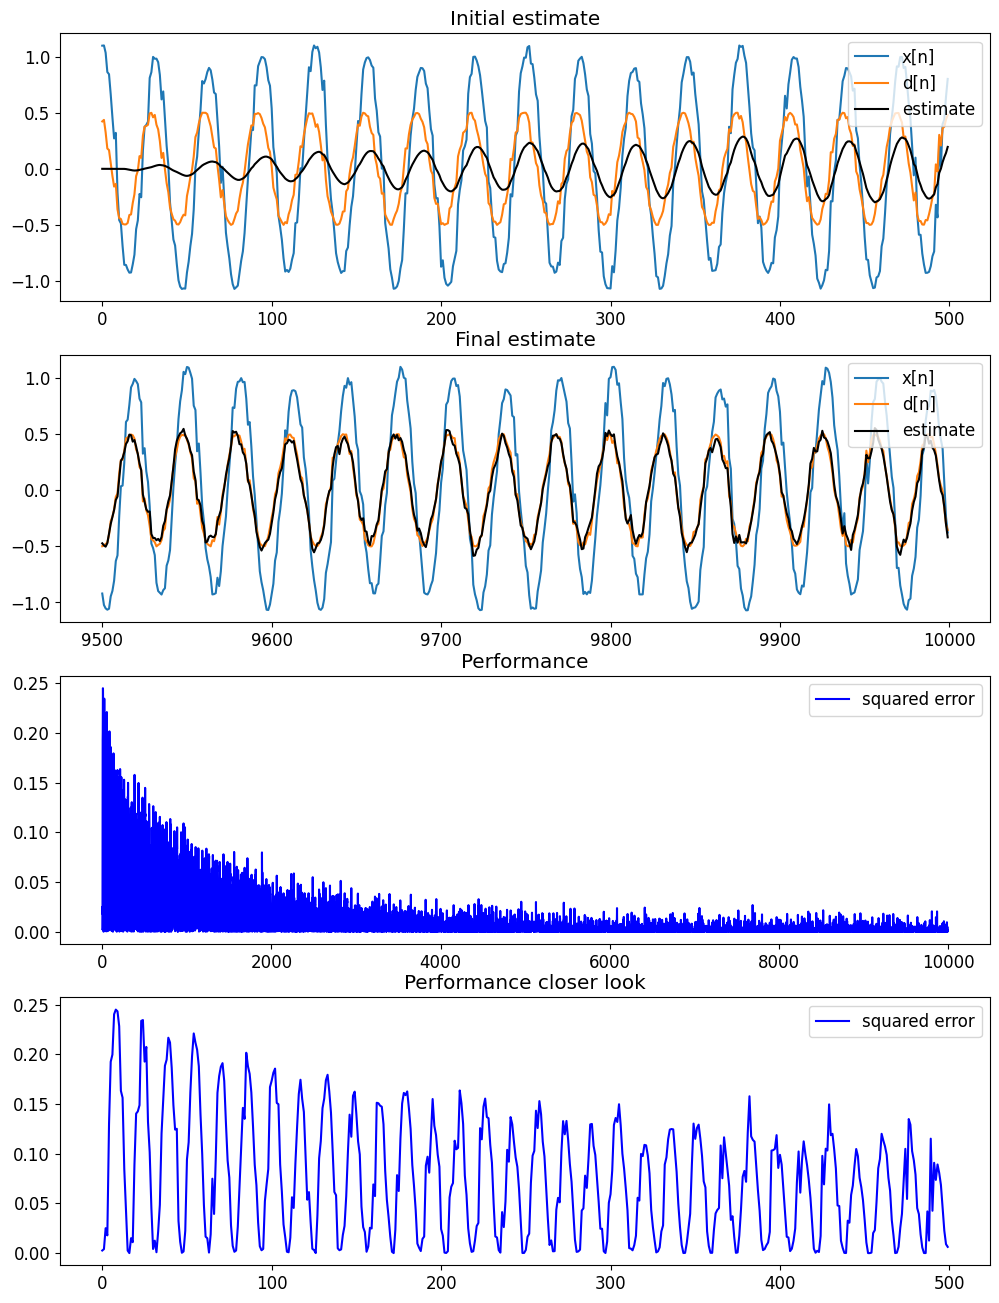

In [5]:
fig, ax = plt.subplots(4)
fig.set_figwidth(12)
fig.set_figheight(16)

ax[0].set_title('Initial estimate')
ax[0].plot(x[:500], label='x[n]')
ax[0].plot(d[:500], label='d[n]')
ax[0].plot(lms.estimate[:500], 'k', label='estimate')

n_late = np.arange(500) + samples - 500
ax[1].set_title('Final estimate')
ax[1].plot(n_late, x[-500:], label='x[n]')
ax[1].plot(n_late, d[-500:], label='d[n]')
ax[1].plot(n_late, lms.estimate[-500:], 'k', label='estimate')

ax[2].set_title('Performance')
ax[2].plot(lms.error**2, 'b', label='squared error')

ax[3].set_title('Performance closer look')
ax[3].plot(lms.error[:500]**2, 'b', label='squared error')

for axis in ax:
    axis.legend()
plt.show()